In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

In [4]:
# Ссылка на скачивание данных в формате CSV
csv_data_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT3Wns_gLiMDfacVgF-x4suNvnAFmgibVkrsizkKqwcVFGSYAVOVnJsoV7gm3jguw/pub?gid=681978523&single=true&output=csv"

# Загрузка данных в DataFrame
data = pd.read_csv(csv_data_url)

# Просмотр первых нескольких строк данных
print(data.head())

   Unnamed: 0                                       problem_text  \
0           0  To prove that the sum of the numbers of the ex...   
1           1  ( b) Will the statement of the previous challe...   
2           2  The quadratic three-member graph with the coef...   
3           3  Can you draw on the surface of Rubik's cube a ...   
4           4  Dima, who came from Vrunlandia, said that ther...   

           topic  
0  number_theory  
1  number_theory  
2       polynoms  
3  combinatorics  
4         graphs  


Пойдем решать задачу по плану

# Подготовка данных:

# Анализ и балансировка классов:
# 

Посмотрим, сколько примеров есть в каждом классе (теме).   
Если некоторые классы недопредставлены, может потребоваться выполнить **дополнительные шаги**, 
такие как аугментация данных для меньших классов или использование взвешивания классов при обучении модели.

# Шаг 1: Сбор данных
Проверим сбалансированность классов. Ты можешь использовать следующий код для отображения количества примеров для каждого класса:

In [8]:
print(data.columns)

Index(['Unnamed: 0', 'problem_text', 'topic'], dtype='object')


topic
number_theory    2396
combinatorics    1020
dirichlet         441
polynoms          426
graphs            384
geometry          371
invariant         235
Name: count, dtype: int64


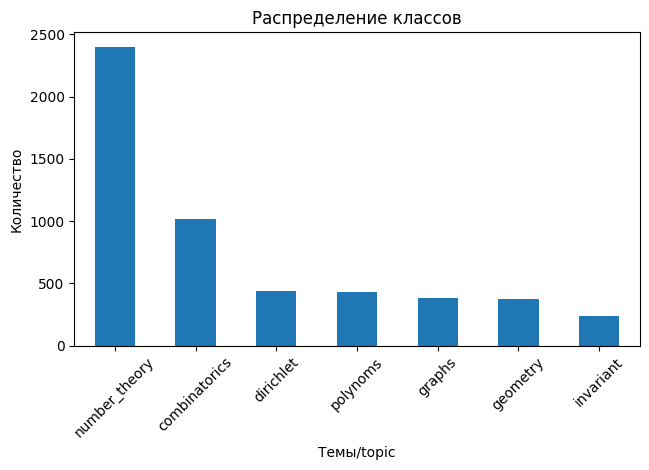

In [15]:
import matplotlib.pyplot as plt

# Предполагая, что у тебя есть колонка 'theme' для тем в твоем DataFrame 'data'
class_counts = data['topic'].value_counts()

# Выведем количество данных по каждой теме
print(class_counts)

# Построим график распределения классов
class_counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Темы/topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Количество')
plt.show()


Если распределение классов сильно несбалансировано, рассмотри возможность использования техник,      
таких как взвешивание классов во время обучения или oversampling/undersampling для более редких/частых классов.

классы в датасете распределены неравномерно. Класс number_theory (теория чисел)     
значительно превосходит другие классы по количеству примеров.     
Такое распределение может привести к предвзятости модели: она будет лучше распознавать классы,     
для которых имеется больше обучающих данных, и хуже — для классов с меньшим количеством данных.

In [6]:
В случае текстовых данных, oversampling с аугментацией текста обычно     
является хорошим выбором. Нужно стремиться сохранить как можно больше информации
в обучающем наборе, одновременно стремясь к его сбалансированности.


Index(['Unnamed: 0', 'problem_text', 'topic'], dtype='object')
